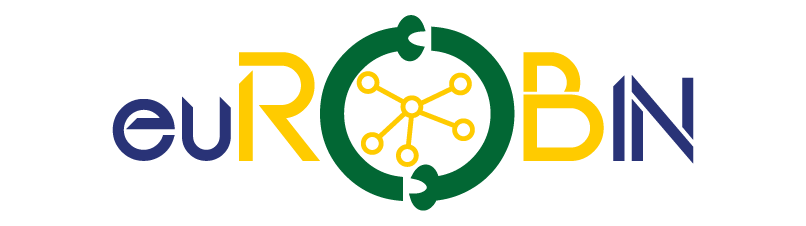

## Content

* lisp basics
* location designator
* move robot
* costmap vis

## Scenario tasks
* move robot to door
* open door
  * parametrization: keyword
* spawn objects
* perceive box
* grasp box
* move robot
* place box
* spawn cup at random

* **switch robot**

* pick cup
* place cup

## Fetching Package Scenario

Welcome to the demo scenario of euROBIN. You will learn how to write a sequence of tasks to make a simulated robot
* open a door
* carry a package
* pick an item out of that package onto the table.

## Lisp Basics

string, function, parameter

## Robot & Environment

We will work with the TIAGo robot in the IAI Bremen apartment laboratory. Open a new tab in JupyterNotebook, then open a Terminal. Execute the following launchfile in that terminal to launch the environment.
```bash
# loads TIAGo
roslaunch cram_projection_demos apartment_tiago.launch

# or load the PR2 
roslaunch cram_projection_demos apartment_pr2.launch
```

Load the CRAM system for our robot demos. Hit CTRL-Enter in the code-blocks to execute them. Wait until the `[*]` symbol turns into a number. Hide the outprint by hitting the blue vertical bar to the left.

In [1]:
(asdf:load-system :cram-projection-demos)

BAD-SYSTEM-NAME: System definition file #P"/home/workspace/ros/src/cram/cram_3rdparty/cl_store/src/cl-store.asd" contains definition for system "cl-store-tests". Please only define "cl-store" and secondary systems with a name starting with "cl-store/" (e.g. "cl-store/test") in that file.
; compiling (IN-PACKAGE #:CFFI)
; compiling (DEFINE-FOREIGN-LIBRARY (LIBFFI) ...)
; compiling (LOAD-FOREIGN-LIBRARY (QUOTE LIBFFI))
; pkg-config libffi --cflags

; cc -o /root/.cache/common-lisp/sbcl-2.0.1.debian-linux-x64/home/workspace/ros/src/cram/cram_3rdparty/cffi/src/libffi/libffi-types__grovel-tmpAAURSO1.o -c -g -O2 -fdebug-prefix-map=/build/sbcl-P5bIxH/sbcl-2.0.1=. -fstack-protector-strong -Wformat -Werror=format-security -g -Wall -Wundef -Wsign-compare -Wpointer-arith -O3 -D_LARGEFILE_SOURCE -D_LARGEFILE64_SOURCE -D_FILE_OFFSET_BITS=64 -Wunused-parameter -fno-omit-frame-pointer -momit-leaf-frame-pointer -fno-pie -fPIC -I/home/workspace/ros/src/cram/cram_3rdparty/cffi/src/ /root/.cache/common-l

T

; compiling (IN-PACKAGE #:PHYSICS-UTILS)
; compiling (DEFCENUM (AI-POST-PROCESS-STEPS) ...)
; compiling (DEFCENUM (AI-PRIMITIVE-TYPE) ...)
; compiling (DEFCENUM (AI-TEXTURE-OP) ...)
; compiling (DEFCENUM (AI-TEXTURE-MAP-MODE) ...)
; compiling (DEFCENUM (AI-TEXTURE-MAPPING) ...)
; compiling (DEFCENUM (AI-TEXTURE-TYPE) ...)
; compiling (DEFCENUM (AI-PROPERTY-TYPE-INFO) ...)
; compiling (DEFCSTRUCT (AI-VECTOR-3D :SIZE ...) ...)
; compiling (DEFCONSTANT SIZE-OF-AI-VECTOR-3D ...)
; compiling (DEFCSTRUCT (AI-MATRIX-4X4 :SIZE ...) ...)
; compiling (DEFCONSTANT SIZE-OF-AI-MATRIX-4X4 ...)
; compiling (DEFCSTRUCT (AI-STRING :SIZE ...) ...)
; compiling (DEFCONSTANT SIZE-OF-AI-STRING ...)
; compiling (DEFCSTRUCT (AI-MATERIAL-PROPERTY :SIZE ...) ...)
; compiling (DEFCONSTANT SIZE-OF-AI-MATERIAL-PROPERTY ...)
; compiling (DEFCSTRUCT (AI-MATERIAL :SIZE ...) ...)
; compiling (DEFCONSTANT SIZE-OF-AI-MATERIAL ...)
; compiling (DEFCSTRUCT (AI-TEXEL :SIZE ...) ...)
; compiling (DEFCONSTANT SIZE-OF-AI-TEXE

Initialize the simulation.

In [2]:
(roslisp-utilities:startup-ros)

NIL

[(ROSLISP TOP) INFO] 1684222571.257: Node name is /cram_hl_243274_1684222571
[(ROSLISP TOP) INFO] 1684222571.257: Namespace is /
[(ROSLISP TOP) INFO] 1684222571.257: Params are NIL
[(ROSLISP TOP) INFO] 1684222571.257: Remappings are:
[(ROSLISP TOP) INFO] 1684222571.257: master URI is 127.0.0.1:11311
[(ROSLISP TOP) INFO] 1684222574.709: Node startup complete
[(ROSNODE) INFO] 1684222574.715: ROS init #<FUNCTION CRAM-TF::INIT-TF>.
[(CRAM-TF INIT-TF) INFO] 1684222574.715: Set *fixed-frame* to "map".
[(CRAM-TF INIT-TF) INFO] 1684222574.746: Environment name is APARTMENT.
[(CRAM-TF INIT-TF) INFO] 1684222574.778: Initialized *transformer* to a TRANSFORM-LISTENER.
[(CRAM-TF INIT-TF) INFO] 1684222574.778: *tf-default-timeout* is 4.0.
[(CRAM-TF INIT-TF) INFO] 1684222574.793: Robot name is TIAGO-DUAL.
[(CRAM-TF INIT-TF) INFO] 1684222574.796: Set *ODOM-FRAME* to "odom".
[(CRAM-TF INIT-TF) INFO] 1684222574.796: Set *ROBOT-BASE-FRAME* to "base_footprint".
[(CRAM-TF INIT-TF) INFO] 1684222574.796: Set

The robot appears at 0,0 by default. Position it in the apartment.

In [3]:
(btr-utils:move-robot '((9 3 0) (0 0 0 1)))

(((CRAM-BULLET-REASONING:?W
   . #<CRAM-BULLET-REASONING:BT-REASONING-WORLD {1020A49E73}>)
  (CRAM-BULLET-REASONING-UTILITIES::?W
   . #<CRAM-BULLET-REASONING:BT-REASONING-WORLD {1020A49E73}>))
 . #S(CRAM-UTILITIES::LAZY-CONS-ELEM
      :GENERATOR #<CLOSURE (LAMBDA ()
                             :IN
                             CRAM-UTILITIES:LAZY-MAPCAR) {1014AAC05B}>))

In [ ]:
(urdf-proj:with-projected-robot
 (demos::eurobin-demo))

Source file [eurobin-demo](../../workspace/ros/src/cram/cram_demos/cram_projection_demos/src/eurobin-demo.lisp)

## Designators

object, location, action, costmap viz, add-vis-axis

## Plan Execution

With CRAM it is pretty easy to write a sequence of tasks. We will develop a simple plan to fetch a package and unpack it.

* move robot to door
* open door
  * parametrization: keyword
* spawn objects
* perceive box
* grasp box
* move robot
* place box
* spawn cup at random
* pick cup
* place cup

In [4]:
;; Define the namespace
(in-package :demos)

#<PACKAGE "CRAM-PROJECTION-DEMOS">

In [5]:
;; Reset the simulation
(initialize-eurobin)

NIL

[(SET-ROBOT-STATE-FROM-TF) WARN] 1684222615.067: Failed with transform-stamped-error:
    No transform was published between frames base_footprint and map
    Ignore this warning if no real robot is running.


In [8]:
(btr-utils:move-robot '((9 3 0) (0 0 0 1)))

(((CRAM-BULLET-REASONING:?W
   . #<CRAM-BULLET-REASONING:BT-REASONING-WORLD {100A1FA3D3}>)
  (CRAM-BULLET-REASONING-UTILITIES::?W
   . #<CRAM-BULLET-REASONING:BT-REASONING-WORLD {100A1FA3D3}>))
 . #S(CRAM-UTILITIES::LAZY-CONS-ELEM
      :GENERATOR #<CLOSURE (LAMBDA ()
                             :IN
                             CRAM-UTILITIES:LAZY-MAPCAR) {1009CEAA0B}>))

In [9]:
;; Move Torso lower limit
(urdf-proj:with-simulated-robot
  (exe:perform
       (desig:an action
                 (type moving-torso)
                 (joint-angle lower-limit))))

NIL

In [10]:
;; Move Torso to joint-state 0.2
(urdf-proj:with-simulated-robot
  (exe:perform
       (desig:an action
                 (type moving-torso)
                 (joint-angle 0.2))))

NIL

In [11]:
;; Move Torso to upper limit
(urdf-proj:with-simulated-robot
  (exe:perform
       (desig:an action
                 (type moving-torso)
                 (joint-angle upper-limit))))

NIL

In [12]:
;; Define a pose on the ground for the robot to stand.
(let ((?base-pose 
       (cl-transforms-stamped:make-pose-stamped
        "map" (roslisp:ros-time)
        (cl-tf:make-3d-vector 9.7d0 4.3d0 0.0d0)
        (cl-tf:euler->quaternion :az (* pi 0.25))))) ;; rotate 45 degree
     (urdf-proj:with-simulated-robot
      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?base-pose)))))))

#<HASH-TABLE :TEST EQUAL :COUNT 71 {100E477183}>

In [13]:
(let ((?base-pose 
       (cl-transforms-stamped:make-pose-stamped
        "map" (roslisp:ros-time)
        (cl-tf:make-3d-vector 9.7d0 4.3d0 0.0d0)
        (cl-tf:euler->quaternion :az (* pi 0.5))))) ;; rotate 90 degree
     (urdf-proj:with-simulated-robot
      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?base-pose)))))))

#<HASH-TABLE :TEST EQUAL :COUNT 71 {1011022053}>

In [14]:
(let ((?base-pose 
       (cl-transforms-stamped:make-pose-stamped
        "map" (roslisp:ros-time)
        (cl-tf:make-3d-vector 9.7d0 4.3d0 0.0d0)
        (cl-tf:euler->quaternion :az (* pi 0.75))))) ;; rotate 135 degree
     (urdf-proj:with-simulated-robot
      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?base-pose)))))))

#<HASH-TABLE :TEST EQUAL :COUNT 71 {1013741873}>

In [15]:
;; Open the door a bit
(urdf-proj:with-simulated-robot 
 (exe:perform
  (desig:an action
            (type opening)
            (arm right)
            (distance 0.4)
            (grasps (door-angled))
            (object (desig:an object
                              (type cupboard)
                              (urdf-name window4-right)
                              (part-of apartment))))))

NIL

In [16]:
;; Reposition
(let ((?base-pose 
       (cl-transforms-stamped:make-pose-stamped
        "map" (roslisp:ros-time)
        (cl-tf:make-3d-vector 9.8d0 4.1d0 0.0d0)
        (cl-tf:euler->quaternion :az (* pi 0.75))))) ;; rotate 135 degree
     (urdf-proj:with-simulated-robot
      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?base-pose)))))))

#<HASH-TABLE :TEST EQUAL :COUNT 71 {101627A613}>

In [17]:
;; Open the door a bit
(urdf-proj:with-simulated-robot 
 (exe:perform
  (desig:an action
            (type opening)
            (arm right)
            (distance 1.0)
            (grasps (door-angled))
            (object (desig:an object
                              (type cupboard)
                              (urdf-name window4-right)
                              (part-of apartment))))))

NIL

In [18]:
;; Open the door a lot
(urdf-proj:with-simulated-robot 
 (exe:perform
  (desig:an action
            (type opening)
            (arm right)
            (distance 1.5)
            (grasps (door-angled))
            (object (desig:an object
                              (type cupboard)
                              (urdf-name window4-right)
                              (part-of apartment))))))

NIL

In [27]:
;; Spawn Objects
    (unless (btr:object btr:*current-bullet-world* :package-stand)
      (btr:add-object btr:*current-bullet-world*
                      :cylinder
                      :package-stand
                      '((9.95 5.40 0.35)(0 0 0 1))
                      :size '(0.3 0.3 0.7)
                      :mass 1.0))
    (btr-utils:spawn-object :open-box :open-box :pose '((9.95 5.40 0.8) (0 0 0 1)))

#<CRAM-BULLET-REASONING:OBJECT {10118E0CE3}>

#<CRAM-BULLET-REASONING:ITEM {1012022F03}>

In [26]:
(let ((?picking-up-package-base-pose
      (cl-transforms-stamped:make-pose-stamped
       "map" (roslisp:ros-time)
       (cl-tf:make-3d-vector 9.5d0 4.6d0 0.0d0)
       (cl-tf:euler->quaternion :az (* pi 0.5)))))
     
     (btr:add-vis-axis-object ?picking-up-package-base-pose)
     
     (urdf-proj:with-simulated-robot 
         (exe:perform
               (desig:an action
                     (type going)
                     (target (desig:a location
                                      (pose ?picking-up-package-base-pose)))))))

#<HASH-TABLE :TEST EQUAL :COUNT 71 {100C07A613}>

In [29]:
;; perceive package - EXPECTING ERROR
(urdf-proj:with-simulated-robot 
 (exe:perform
  (desig:an action
           (type detecting)
           (object (desig:an object
                             (type open-box))))))
        

PERCEPTION-OBJECT-NOT-FOUND: Could not find object #<(A OBJECT
                           (TYPE OPEN-BOX))>.



PERCEPTION-OBJECT-NOT-FOUND: Could not find object #<(A OBJECT
                           (TYPE OPEN-BOX))>.

In [35]:
;; 
(urdf-proj:with-simulated-robot

(cpl:with-retry-counters ((detect-retries 1))
    (cpl:with-failure-handling
     ;; when an object can't be found...
        ((common-fail:perception-object-not-found (e)
           (roslisp:ros-warn (pp-plans pick-up)
                             "Looking-at had a problem: ~a~%Ignoring."
                             e)
     (let ((?door-poi
       (cl-tf:make-pose-stamped
        "base_footprint" 0.0
        (cl-tf:make-3d-vector 1.0 -0.5 0.5)
        (cl-tf:make-identity-rotation))))
           ;; tilt the head to look to the bottom right...
           (exe:perform
               (desig:an action
                  (type looking)
                  (target (desig:a location
                                   (pose ?door-poi)))))
           (cpl:do-retry detect-retries
             (cpl:retry))
           (return)))
      ;; perceive on object that looks like an open box
      (exe:perform
       (desig:an action
           (type detecting)
           (object (desig:an object
                             (type open-box)))))))))


#<(A OBJECT
     (TYPE OPEN-BOX)
     (NAME OPEN-BOX)
     (POSE ((POSE
             #<POSE-STAMPED 
   FRAME-ID: "base_footprint", STAMP: 0.0
   #<3D-VECTOR (0.7957560339321885d0 -0.45110884801690965d0 0.8013261159338678d0)>
   #<QUATERNION (-5.8421583092054094d-5 -6.439348152067264d-5 -0.7059164990943063d0 0.7082950644332602d0)>>)
            (TRANSFORM
             #<TRANSFORM-STAMPED 
   FRAME-ID: "base_footprint", CHILD-FRAME-ID: "open_box", STAMP: 0.0
   #<3D-VECTOR (0.7957560339321885d0 -0.45110884801690965d0 0.8013261159338678d0)>
   #<QUATERNION (-5.8421583092054094d-5 -6.439348152067264d-5 -0.7059164990943063d0 0.7082950644332602d0)>>)
            (POSE-IN-MAP
             #<POSE-STAMPED 
   FRAME-ID: "map", STAMP: 0.0
   #<3D-VECTOR (9.951108805338542d0 5.395756022135417d0 0.8013261159261068d0)>
   #<QUATERNION (4.222769803163828d-6 -8.684336353326216d-5 0.0016818996518850327d0 0.9999985694885254d0)>>)
            (TRANSFORM-IN-MAP
             #<TRANSFORM-STAMPED 
   FRAME-

In [36]:
(urdf-proj:with-simulated-robot
      ;; perceive package
      (let ((?package-desig (exe:perform
                             (desig:an action
                                       (type detecting)
                                       (object (desig:an object
                                                         (type open-box)))))))
        ;; pick-up the package
        (exe:perform
         (desig:an action
                   (type picking-up)
                   (object ?package-desig)
                   (park-arms nil)))))

NIL

In [39]:
(urdf-proj:with-simulated-robot
 (let ((?placing-package-base-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 15.4d0 2.0d0 0.0d0)
            (cl-tf:euler->quaternion :az (* pi 0.0)))))
      ;; going to placing location
      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?placing-package-base-pose)))))))

#<HASH-TABLE :TEST EQUAL :COUNT 71 {101683A613}>

In [40]:
(urdf-proj:with-simulated-robot
 (let ((?box-delivery-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 16.05d0 1.87d0 0.56d0)
            (cl-tf:euler->quaternion :az (* pi 0.0)))))
      ;; place box
      (exe:perform
       (desig:an action
                 (type placing)
                 (target (desig:a location
                                  (pose ?box-delivery-pose)))))))

DESIGNATOR-REFERENCE-FAILURE: Designator #<(A ACTION
                (TYPE PLACING)
                (TARGET #<(A LOCATION
                             (POSE #<POSE-STAMPED 
   FRAME-ID: "map", STAMP: 1.684224507374899d9
   #<3D-VECTOR (16.05d0 1.87d0 0.56d0)>
   #<QUATERNION (0.0d0 0.0d0 0.0d0 1.0d0)>>))>))> could not be resolved.




DESIGNATOR-REFERENCE-FAILURE: Designator #<(A ACTION
                (TYPE PLACING)
                (TARGET #<(A LOCATION
                             (POSE #<POSE-STAMPED 
   FRAME-ID: "map", STAMP: 1.684224507374899d9
   #<3D-VECTOR (16.05d0 1.87d0 0.56d0)>
   #<QUATERNION (0.0d0 0.0d0 0.0d0 1.0d0)>>))>))> could not be resolved.


In [17]:
(defun park-robot (&optional (?nav-pose
                              (cl-transforms-stamped:make-pose-stamped
                               cram-tf:*fixed-frame*
                               0.0
                               (cl-transforms:make-identity-vector)
                               (cl-transforms:make-identity-rotation))))
  (cpl:with-failure-handling
      ((cpl:plan-failure (e)
         (declare (ignore e))
         (return)))
    (cpl:par
      (exe:perform
       (desig:an action
                 (type positioning-arm)
                 (left-configuration park)
                 (right-configuration park)))
      (exe:perform
       (desig:an action
                 (type moving-torso)
                 (joint-angle upper-limit)))
      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?nav-pose)))))
      (exe:perform (desig:an action (type opening-gripper) (gripper (left right))))
      (exe:perform (desig:an action (type looking) (direction forward))))))

PARK-ROBOT

SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining CRAM-PROJECTION-DEMOS::PARK-ROBOT in DEFUN


In [ ]:
  (let* (;; Initialize desigs for objects and locations
         (?accessing-window-base-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 9.7d0 4.3d0 0.0d0)
            (cl-tf:euler->quaternion :az (* pi 0.75))))
         (?accessing-window-base-pose-2
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 9.5d0 4.3d0 0.0d0)
            (cl-tf:euler->quaternion :az (* pi 0.25))))
         (?accessing-window-base-front-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 9.3d0 4.2d0 0.0d0)
            (cl-tf:euler->quaternion :az (* pi 0.5))))
         (?picking-up-package-base-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 9.5d0 4.6d0 0.0d0)
            (cl-tf:euler->quaternion :az (* pi 0.5))))
         (?placing-package-base-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 15.4d0 2.0d0 0.0d0)
            (cl-tf:euler->quaternion :az (* pi 0.0))))
         (?box-delivery-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 16.05d0 1.87d0 0.56d0)
            (cl-tf:euler->quaternion :az (* pi 0.0))))
         (?item-delivery-base-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 15.5d0 3.0d0 0.0d0)
            (cl-tf:euler->quaternion :az (* pi 0.0))))
         (?item-delivery-pose
           (cl-transforms-stamped:make-pose-stamped
            "map" (roslisp:ros-time)
            (cl-tf:make-3d-vector 16.2d0 3.0d0 0.48d0)
            (cl-tf:euler->quaternion :az (* pi 0.0)))))

    ;;; ---
    ;;; Step 0: Init apartment, reset joints, desigs and objects
    (when (<= step 0)
      (initialize-eurobin))

    ;;; ---
    ;;; Go and open the door
    (when (<= step 1)
      (park-robot ?accessing-window-base-front-pose)
      ;; (exe:perform
      ;;  (desig:an action
      ;;            (type going)
      ;;            (target (desig:a location
      ;;                             (pose ?accessing-window-base-pose-2)))))
      )
    (when (<= step 2)
      (exe:perform
          (desig:an action
                    (type opening)
                    (arm right)
                    (distance 1.55)
                    (grasps (door-angled))
                    ;; (link window4-left-handle)
                    (object (desig:an object
                                      (type cupboard)
                                      (urdf-name window4-right)
                                      (part-of apartment))))))


    ;; (when (<= step 3)
    ;;   (exe:perform
    ;;    (desig:an action
    ;;              (type going)
    ;;              (target (desig:a location
    ;;                               (pose ?accessing-window-base-pose-2))))))

    ;; (when (<= step 4)
    ;;   (exe:perform
    ;;       (desig:an action
    ;;                 (type opening)
    ;;                 (arm right)
    ;;                 (distance 1.2)
    ;;                 (grasps (door-left))
    ;;                 (object (desig:an object
    ;;                                   (type cupboard)
    ;;                                   (urdf-name window4-right)
    ;;                                   (part-of apartment))))))

    (unless (btr:object btr:*current-bullet-world* :package-stand)
      (btr:add-object btr:*current-bullet-world*
                      :cylinder
                      :package-stand
                      '((9.95 5.40 0.35)(0 0 0 1))
                      :size '(0.3 0.3 0.7)
                      :mass 1.0))
    (btr-utils:spawn-object :open-box :open-box :pose '((9.95 5.40 0.8) (0 0 0 1)))

    ;;; ---
    ;;; Take the package and carry it to the table
    (when (<= step 5)
      ;; go to open door
      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?picking-up-package-base-pose)))))
      ;; look at package
      (let ((?door-poi
               (cl-tf:make-pose-stamped
                "base_footprint" 0.0
                (cl-tf:make-3d-vector 1.0 -0.5 0.5)
                (cl-tf:make-identity-rotation))))
        (exe:perform
         (desig:an action (type looking)
                   (target (desig:a location
                                    (pose ?door-poi))))))
      ;; perceive package
      (let ((?package-desig (exe:perform
                             (desig:an action
                                       (type detecting)
                                       (object (desig:an object
                                                         (type open-box)))))))
        ;; pick-up the package
        (exe:perform
         (desig:an action
                   (type picking-up)
                   (object ?package-desig)
                   (park-arms nil))))

      ;; going to placing location
      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?placing-package-base-pose)))))

      ;; place box
      (exe:perform
       (desig:an action
                 (type placing)
                 (target (desig:a location
                                  (pose ?box-delivery-pose))))))

    ;;; ---
    ;;; Pick items out of the package and place
    (when (<= step 3)
      (btr-utils:spawn-object :jeroen-cup :jeroen-cup :pose '((16.05d0 1.87d0 0.56d0)(0 0 0 1)))

      (let ((?package-desig (exe:perform
                             (desig:an action
                                       (type detecting)
                                       (object (desig:an object
                                                         (type jeroen-cup)))))))
        ;; pick-up the package
        (exe:perform
         (desig:an action
                   (type picking-up)
                   (object ?package-desig)
                   (grasp top))))

      (exe:perform
       (desig:an action
                 (type going)
                 (target (desig:a location
                                  (pose ?item-delivery-base-pose)))))

      (exe:perform
       (desig:an action
                 (type placing)
                 (target (desig:a location
                                  (pose ?item-delivery-pose)))))))
  (finalize))

# Utils


In [30]:
(btr-utils:reset-debug-window)

NIL

In [ ]:
(btr:add-vis-axis-object ...some-pose)

In [ ]:
;; Park Arms
(urdf-proj:with-simulated-robot
 (exe:perform
       (desig:an action
                 (type positioning-arm)
                 (left-configuration park)
                 (right-configuration park))))